In [1]:
import pandas as pd
import seaborn as sn
import math
from nltk import word_tokenize

In [2]:
path = "../datasets/dataset_full.csv"
original_df = pd.read_csv(path)
original_df.head(20)

,gene,snp,text
0,CARD14,Rs144475004,"rs144475004, also known as c.526G>C, p.Asp176H..."
1,CARD14,Rs281875212,"rs281875212, also known as c.424G>A, p.Glu142L..."
2,CARD14,Rs281875213,"rs281875213, also known as c.425A>G, p.Glu142G..."
3,CARD14,Rs281875214,"rs281875214, also known as c.413A>C, p.Glu138A..."
4,CARD14,Rs281875215,"rs281875215, also known as c.349G>A, p.Gly117S..."
5,CARD14,Rs387907240,"rs387907240, also known as c.467T>C, p.Leu156P..."
6,CARD14,Rs587777763,"rs587777763, also known as c.349+5G>A, represe..."
7,ADAM10,I6006817,rs145518263Alzheimer's disease assocation
8,ADAM10,I6006818,rs61751103Alzheimer's disease assocation
9,ADAM10,Rs145518263,"rs145518263, also known as R181G or Arg181Gly,..."


In [3]:
original_df.shape

(5214, 3)

In [4]:
# Prepare a dataframe that has just the unique text strings and unique IDs for each of those texts.
df = pd.DataFrame(pd.unique(original_df["text"]), columns=["text"])
df["id"] = range(df.shape[0])
df = df[["id","text"]]
df.head(20)

,id,text
0,0,"rs144475004, also known as c.526G>C, p.Asp176H..."
1,1,"rs281875212, also known as c.424G>A, p.Glu142L..."
2,2,"rs281875213, also known as c.425A>G, p.Glu142G..."
3,3,"rs281875214, also known as c.413A>C, p.Glu138A..."
4,4,"rs281875215, also known as c.349G>A, p.Gly117S..."
5,5,"rs387907240, also known as c.467T>C, p.Leu156P..."
6,6,"rs587777763, also known as c.349+5G>A, represe..."
7,7,rs145518263Alzheimer's disease assocation
8,8,rs61751103Alzheimer's disease assocation
9,9,"rs145518263, also known as R181G or Arg181Gly,..."


In [5]:
df.shape

(4361, 2)

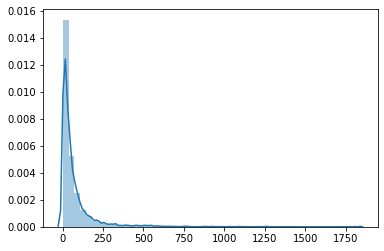

In [6]:
# Look at what the distribution is across these texts in terms of number of words.
word_num_distribution = [len(word_tokenize(x)) for x in df["text"].values]
sn.distplot(word_num_distribution)

In [7]:
# What do we want to choose for these values?
num_surveys = 100
max_block_size = 300

In [8]:
# Specify n bin edges here, and then from those a set of n-1 bins are defined and used throughout the notebook.
# The lower edges will be inclusive and the upper edges will be exclusive.
thresholds = [0, 10, 50, 100, 1000, 2000]

bin_ids_list = list(range(1,len(thresholds)))
bounds_list = [(lower,upper) for lower,upper in zip(thresholds[0:len(thresholds)-1], thresholds[1:len(thresholds)])]

print(bin_ids_list)
print(bounds_list)

[1, 2, 3, 4, 5]
[(0, 10), (10, 50), (50, 100), (100, 1000), (1000, 2000)]


In [9]:
# Add a column indicating the number of words in each text.
df["num_words"] = df["text"].map(lambda x: len(word_tokenize(x)))
df.head(20)

,id,text,num_words
0,0,"rs144475004, also known as c.526G>C, p.Asp176H...",77
1,1,"rs281875212, also known as c.424G>A, p.Glu142L...",39
2,2,"rs281875213, also known as c.425A>G, p.Glu142G...",39
3,3,"rs281875214, also known as c.413A>C, p.Glu138A...",42
4,4,"rs281875215, also known as c.349G>A, p.Gly117S...",42
5,5,"rs387907240, also known as c.467T>C, p.Leu156P...",52
6,6,"rs587777763, also known as c.349+5G>A, represe...",38
7,7,rs145518263Alzheimer's disease assocation,4
8,8,rs61751103Alzheimer's disease assocation,4
9,9,"rs145518263, also known as R181G or Arg181Gly,...",91


In [10]:
# The x value should be a particular integer, and the ranges should be a list of tuples of lower and upper bounds.
in_range = lambda x,bounds: (x>=bounds[0] and x<bounds[1])
in_ranges = lambda x,list_of_bounds_tuples: [in_range(x,bounds) for bounds in list_of_bounds_tuples]

# Helpful function needed here for finding the index of the one true value in a boolean list.
def index_of_true_value_in_list(bool_list):
    assert sum(bool_list) == 1
    return([i for i,x in enumerate(bool_list) if x][0])

# Add a column indicating the ID for the bin that each text belongs in based on the number of words.
df["bin_id"] = df["num_words"].map(lambda x: bin_ids_list[index_of_true_value_in_list(in_ranges(x,bounds_list))])
df.head(20)

,id,text,num_words,bin_id
0,0,"rs144475004, also known as c.526G>C, p.Asp176H...",77,3
1,1,"rs281875212, also known as c.424G>A, p.Glu142L...",39,2
2,2,"rs281875213, also known as c.425A>G, p.Glu142G...",39,2
3,3,"rs281875214, also known as c.413A>C, p.Glu138A...",42,2
4,4,"rs281875215, also known as c.349G>A, p.Gly117S...",42,2
5,5,"rs387907240, also known as c.467T>C, p.Leu156P...",52,3
6,6,"rs587777763, also known as c.349+5G>A, represe...",38,2
7,7,rs145518263Alzheimer's disease assocation,4,1
8,8,rs61751103Alzheimer's disease assocation,4,1
9,9,"rs145518263, also known as R181G or Arg181Gly,...",91,3


In [11]:
# Obtain the one-to-many mapping from bin IDs to the IDs for each unique piece of text in the dataset.
bin_ids_to_text_ids = dict(df.groupby("bin_id")["id"].apply(list))
bin_ids_to_bin_quantities = {bin_id:len(text_ids) for bin_id,text_ids in bin_ids_to_text_ids.items()}




text_ids_to_block_ids = {}
first_block_id = 1
block_id = first_block_id

for bin_id,bin_qty in bin_ids_to_bin_quantities.items():
    
    # Figuring out how many blocks are needed to cover this bin and how large each should be.
    num_blocks_needed = math.ceil(bin_qty/max_block_size)
    block_ids = range(block_id, block_id+num_blocks_needed)
    min_block_size = math.floor(bin_qty/num_blocks_needed)
    block_sizes = [min_block_size]*num_blocks_needed
    leftovers = bin_qty-sum(block_sizes)
    for i in range(leftovers):
        block_sizes[i] = block_sizes[i]+1
        
    # Make a mapping between all the text IDs for everything in this bin to corresponding new block IDs.
    block_id_long_list = []
    for block_id,block_size in zip(block_ids,block_sizes):
        block_id_long_list.extend([block_id]*block_size)
    text_ids_to_block_ids_inner = {text_id:block_id for text_id,block_id in zip(bin_ids_to_text_ids[bin_id],block_id_long_list)}
    text_ids_to_block_ids.update(text_ids_to_block_ids_inner)
    block_id = max(block_ids)+1

# Add the column for block IDs, and figure out the number of texts in each bin and block.
df["block_id"] = df["id"].map(text_ids_to_block_ids)
df["block_size"] = df["block_id"].map(dict(df.groupby("block_id").size()))
df["bin_size"] = df["bin_id"].map(dict(df.groupby("bin_id").size()))
df["block_sample"] = df["block_size"].map(lambda x: math.ceil(x/num_surveys))
df.head(20)

,id,text,num_words,bin_id,block_id,block_size,bin_size,block_sample
0,0,"rs144475004, also known as c.526G>C, p.Asp176H...",77,3,11,253,757,3
1,1,"rs281875212, also known as c.424G>A, p.Glu142L...",39,2,5,293,1754,3
2,2,"rs281875213, also known as c.425A>G, p.Glu142G...",39,2,5,293,1754,3
3,3,"rs281875214, also known as c.413A>C, p.Glu138A...",42,2,5,293,1754,3
4,4,"rs281875215, also known as c.349G>A, p.Gly117S...",42,2,5,293,1754,3
5,5,"rs387907240, also known as c.467T>C, p.Leu156P...",52,3,11,253,757,3
6,6,"rs587777763, also known as c.349+5G>A, represe...",38,2,5,293,1754,3
7,7,rs145518263Alzheimer's disease assocation,4,1,1,270,1078,3
8,8,rs61751103Alzheimer's disease assocation,4,1,1,270,1078,3
9,9,"rs145518263, also known as R181G or Arg181Gly,...",91,3,11,253,757,3


In [12]:
# What is the relationship between the bin IDs and the block IDs?
blocks_df = pd.DataFrame(df.drop_duplicates(subset=["block_id"], inplace=False))
blocks_df = blocks_df[["bin_id", "bin_size", "block_id", "block_size", "block_sample"]]
blocks_df.sort_values(by=["bin_id","block_id"], inplace=True)
blocks_df.reset_index(drop=True, inplace=True)
blocks_df

,bin_id,bin_size,block_id,block_size,block_sample
0,1,1078,1,270,3
1,1,1078,2,270,3
2,1,1078,3,269,3
3,1,1078,4,269,3
4,2,1754,5,293,3
5,2,1754,6,293,3
6,2,1754,7,292,3
7,2,1754,8,292,3
8,2,1754,9,292,3
9,2,1754,10,292,3


In [13]:
# If splitting into bins, blocks, and sampling was done that way, what would the content for one survey look like?
bin_id_to_num_texts_per_survey = dict(blocks_df.groupby("bin_id")["block_sample"].sum())
for bin_id,bounds in zip(bin_ids_list, bounds_list):
    num_texts = bin_id_to_num_texts_per_survey[bin_id]
    lower = bounds[0]
    upper = bounds[1]
    print("{} texts ranging from {} to {} words long.".format(num_texts, lower, upper))

12 texts ranging from 0 to 10 words long.
18 texts ranging from 10 to 50 words long.
9 texts ranging from 50 to 100 words long.
9 texts ranging from 100 to 1000 words long.
1 texts ranging from 1000 to 2000 words long.


In [14]:
'''
# Quick math for how the texts should be organized into blocks for cleaning?
bins = [0,10,50,100,1000,1100,2000]
num_surveys = 50
max_block_size = 300



num_bins = len(bins)-1

lower_bounds = [x for x in bins[0:len(bins)-1]]
upper_bounds = [x for x in bins[1:len(bins)]]
bounds = list(zip(lower_bounds,upper_bounds))
bin_quantities = [quantity_in_range(word_num_distribution, lower, upper) for lower,upper in bounds]
assert num_bins == len(bin_quantities)


blocks = []

rows = []



bin_values = list(enumerate(zip(bin_quantities, lower_bounds, upper_bounds),1))
block_number = 1
for bin_number,(bin_qty,lower_bound,upper_bound) in bin_values:
    num_blocks_needed = math.ceil(bin_qty/max_block_size)
    min_block_size = math.floor(bin_qty/num_blocks_needed)
    block_sizes = [min_block_size]*num_blocks_needed
    leftovers = bin_qty-sum(block_sizes)
    for i in range(leftovers):
        block_sizes[i] = block_sizes[i]+1
        
    for block_qty in block_sizes:
        per_survey = math.ceil(block_qty/num_surveys)
        rows.append((bin_number, bin_qty, lower_bound, upper_bound, block_number, block_qty, per_survey))
        block_number = block_number+1

cols = ["bin_id", "bin_quantity", "lower_bound", "upper_bound", "block_id", "block_quantity", "question_quantity"]
pd.DataFrame(rows, columns=cols)
'''

'\n# Quick math for how the texts should be organized into blocks for cleaning?\nbins = [0,10,50,100,1000,1100,2000]\nnum_surveys = 50\nmax_block_size = 300\n\n\n\nnum_bins = len(bins)-1\n\nlower_bounds = [x for x in bins[0:len(bins)-1]]\nupper_bounds = [x for x in bins[1:len(bins)]]\nbounds = list(zip(lower_bounds,upper_bounds))\nbin_quantities = [quantity_in_range(word_num_distribution, lower, upper) for lower,upper in bounds]\nassert num_bins == len(bin_quantities)\n\n\nblocks = []\n\nrows = []\n\n\n\nbin_values = list(enumerate(zip(bin_quantities, lower_bounds, upper_bounds),1))\nblock_number = 1\nfor bin_number,(bin_qty,lower_bound,upper_bound) in bin_values:\n    num_blocks_needed = math.ceil(bin_qty/max_block_size)\n    min_block_size = math.floor(bin_qty/num_blocks_needed)\n    block_sizes = [min_block_size]*num_blocks_needed\n    leftovers = bin_qty-sum(block_sizes)\n    for i in range(leftovers):\n        block_sizes[i] = block_sizes[i]+1\n        \n    for block_qty in block